In [82]:
import pandas as pd
import numpy as np
import os

In [83]:
df = pd.read_csv("22-23pl.csv")

In [114]:
mid_season = pd.to_datetime('2023-01-25')
end_of_season = pd.to_datetime('2023-08-30')

In [120]:
def get_table_by_time(date,df):
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    table = pd.DataFrame(columns=["Club","PlayedMatches","Point","Win","Draw","Loose","GDifference","Position","GDRank"])
    
    teams = (pd.concat([df["HomeTeam"],df["AwayTeam"]])).unique()
    
    for team in teams:
        home_matches = df[df['HomeTeam'] == team]
        away_matches = df[df['AwayTeam'] == team]
        home_matches = home_matches[home_matches['Date']<date]
        away_matches = away_matches[away_matches['Date']<date]

        played_matches = len(home_matches) + len(away_matches)
        wins = len(home_matches[home_matches["FTHG"]>home_matches["FTAG"]]) + len(away_matches[away_matches['FTAG'] > away_matches['FTHG']])
        draws = len(home_matches[home_matches['FTHG'] == home_matches['FTAG']]) + len(away_matches[away_matches['FTHG'] == away_matches['FTAG']])
        looses = played_matches - wins - draws
        point = wins*3 + draws

        goal_difference = sum(home_matches['FTHG'] - home_matches['FTAG']) + sum(away_matches['FTAG'] - away_matches['FTHG'])

        table = table.append({
            'Club': team,
            'PlayedMatches': played_matches,
            'Point' : point,
            'Win': wins,
            'Draw': draws,
            'Loose': looses,
            'GDifference': goal_difference,
            'Position': 0,
            'GDRank': 0,
        }, ignore_index=True)
        
    table = table.sort_values(by="GDifference", ascending=False)
    table['GDRank'] = range(1,len(table)+1)
    
    table = table.sort_values(by="Point", ascending=False)
    table['Position'] = range(1,len(table)+1)
    
    table = table[['Club','Position','GDRank']]
    return table.reset_index(drop=True)

In [128]:
mid_season_table = get_table_by_time(mid_season,df)

C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_18964\1860369013.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_18964\1860369013.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_18964\1860369013.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_18964\1860369013.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_18964\1860369013.py:21

In [129]:
end_of_season_table = get_table_by_time(end_of_season,df)

C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_18964\1860369013.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_18964\1860369013.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_18964\1860369013.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_18964\1860369013.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_18964\1860369013.py:21

In [130]:
end_of_season_table

,Club,Position,GDRank
0,Man City,1,1
1,Arsenal,2,2
2,Man United,3,6
3,Newcastle,4,3
4,Liverpool,5,4
5,Brighton,6,5
6,Aston Villa,7,9
7,Tottenham,8,8
8,Brentford,9,7
9,Fulham,10,10


In [131]:

mid_season_table

,Club,Position,GDRank
0,Arsenal,1,2
1,Man City,2,1
2,Newcastle,3,3
3,Man United,4,7
4,Tottenham,5,6
5,Brighton,6,4
6,Fulham,7,9
7,Brentford,8,8
8,Liverpool,9,5
9,Chelsea,10,10


In [145]:
combined_table = pd.merge(mid_season_table, end_of_season_table, on='Club', suffixes=('_mid', '_end'))
combined_table['AbsDiff_Position'] = abs(combined_table['Position_end'] - combined_table['Position_mid'])
combined_table['AbsDiff_GDRank'] = abs(combined_table['Position_end'] - combined_table['GDRank_mid'])
combined_table = combined_table.sort_values(by='Position_end').reset_index(drop=True)

In [146]:
combined_table

,Club,Position_mid,GDRank_mid,Position_end,GDRank_end,AbsDiff_Position,AbsDiff_GDRank
0,Man City,2,1,1,1,1,0
1,Arsenal,1,2,2,2,1,0
2,Man United,4,7,3,6,1,4
3,Newcastle,3,3,4,3,1,1
4,Liverpool,9,5,5,4,4,0
5,Brighton,6,4,6,5,0,2
6,Aston Villa,11,11,7,9,4,4
7,Tottenham,5,6,8,8,3,2
8,Brentford,8,8,9,7,1,1
9,Fulham,7,9,10,10,3,1


In [147]:
print("abs pos dif:  ",combined_table["AbsDiff_Position"].head(10).sum(),"  abs gd dif:  ",combined_table["AbsDiff_GDRank"].head(10).sum())

abs pos dif:   19   abs gd dif:   15


In [148]:
import matplotlib.pyplot as plt

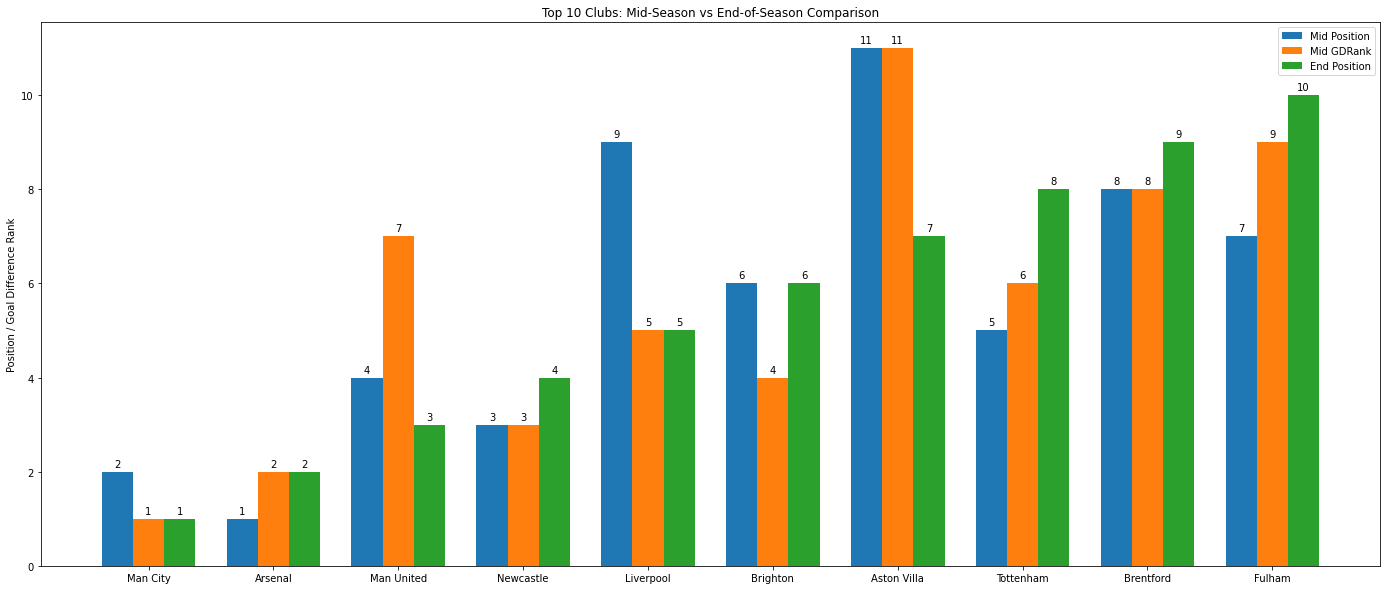

In [163]:
top_n = 10
top_clubs = combined_table.head(top_n)

fig, ax = plt.subplots(figsize=(24, 10))
width = 0.25  # the width of the bars

mid_position_bars = ax.bar(top_clubs.index - width, top_clubs['Position_mid'], width, label='Mid Position')
mid_gdrank_bars = ax.bar(top_clubs.index, top_clubs['GDRank_mid'], width, label='Mid GDRank')
end_position_bars = ax.bar(top_clubs.index + width, top_clubs['Position_end'], width, label='End Position')

ax.set_xticks(top_clubs.index)
ax.set_xticklabels(top_clubs['Club'])
ax.legend()
ax.set_ylabel('Position / Goal Difference Rank')
ax.set_title('Top 10 Clubs: Mid-Season vs End-of-Season Comparison')

# Add value annotations on top of the bars
for bars in [mid_position_bars, mid_gdrank_bars, end_position_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

In [2]:
import seaborn as sns

# Assuming 'combined_table' is your combined DataFrame
sns.scatterplot(x='Position_mid', y='Position_end', data=combined_table, hue='Club')
plt.xlabel('Mid-Season Position')
plt.ylabel('End-of-Season Position')
plt.title('Scatter Plot: Mid-Season vs End-of-Season Position')
plt.show()


ModuleNotFoundError: No module named 'seaborn'